In [27]:
source(file.path("..", "R", "init.R"))
init(where = "container")

suppressMessages({
  library(dplyr)
  library(ggplot2)
  library(reticulate)
  library(lhs)
  library(future.apply)
  library(future)
  library(parallel)
})

[1] "Config for container!"


# Generate samples ("LHS" or "FAST")

### Problem

In [3]:
source("problem.R")
problem

$num_vars
[1] 17

$names
 [1] "phen_VegTherTimeResp_X3"   "phen_RepTherTimeResp_X3"  
 [3] "phen_VegPhoMod_X1"         "phen_RepPhoMod_X1"        
 [5] "phen_VegetativeTarget"     "phen_EarlyFloweringTarget"
 [7] "phen_EarlyPodDevTarget"    "phen_FractGrainFill"      
 [9] "phen_MidGrainFill"         "phen_EntGrainFill"        
[11] "phen_Maturing"             "phen_Ripening"            
[13] "leaf_RUE"                  "leaf_AreaLargLeaf"        
[15] "leaf_Phyllochron"          "leaf_ExtinctionCoef_Y1"   
[17] "grain_HarvIndex"          

$bounds
$bounds[[1]]
[1] 21 39

$bounds[[2]]
[1] 21 39

$bounds[[3]]
[1] 10.5 14.5

$bounds[[4]]
[1] 10.5 14.5

$bounds[[5]]
[1] 200 600

$bounds[[6]]
[1] 100 300

$bounds[[7]]
[1]  70 210

$bounds[[8]]
[1] 0.035 0.065

$bounds[[9]]
[1] 0.35 0.65

$bounds[[10]]
[1] 250 750

$bounds[[11]]
[1] 35 65

$bounds[[12]]
[1] 35 65

$bounds[[13]]
[1] 0.8 1.6

$bounds[[14]]
[1] 0.004 0.008

$bounds[[15]]
[1] 35 65

$bounds[[16]]
[1] 0.4 0.8

$bounds[[17]]
[1] 0.35 0.65

### Generate samples

In [44]:
source(file.path("..", "R", "init.R"))
init(where = "container")

# method = "LHS"
# method = "FAST"
method = "SOBOL"

N_SAMPLES = 500L

samples_df <- generate_samples_csv(problem, method, N_SAMPLES)
head(samples_df)

[1] "Config for container!"


[1] "File samples.csv saved!"


,id,phen_VegTherTimeResp_X3,phen_RepTherTimeResp_X3,phen_VegPhoMod_X1,phen_RepPhoMod_X1,phen_VegetativeTarget,phen_EarlyFloweringTarget,phen_EarlyPodDevTarget,phen_FractGrainFill,phen_MidGrainFill,phen_EntGrainFill,phen_Maturing,phen_Ripening,leaf_RUE,leaf_AreaLargLeaf,leaf_Phyllochron,leaf_ExtinctionCoef_Y1,grain_HarvIndex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,22.08722,35.13978,10.95943,14.29022,328.2453,219.3745,102.3648,0.05970558,0.6412212,353.6339,44.28552,36.02457,1.55672,0.007205793,38.04274,0.6308523,0.5503468
2,2,21.47343,35.13978,10.95943,14.29022,328.2453,219.3745,102.3648,0.05970558,0.6412212,353.6339,44.28552,36.02457,1.55672,0.007205793,38.04274,0.6308523,0.5503468
3,3,22.08722,27.29015,10.95943,14.29022,328.2453,219.3745,102.3648,0.05970558,0.6412212,353.6339,44.28552,36.02457,1.55672,0.007205793,38.04274,0.6308523,0.5503468
4,4,22.08722,35.13978,13.05416,14.29022,328.2453,219.3745,102.3648,0.05970558,0.6412212,353.6339,44.28552,36.02457,1.55672,0.007205793,38.04274,0.6308523,0.5503468
5,5,22.08722,35.13978,10.95943,13.62095,328.2453,219.3745,102.3648,0.05970558,0.6412212,353.6339,44.28552,36.02457,1.55672,0.007205793,38.04274,0.6308523,0.5503468
6,6,22.08722,35.13978,10.95943,14.29022,325.5564,219.3745,102.3648,0.05970558,0.6412212,353.6339,44.28552,36.02457,1.55672,0.007205793,38.04274,0.6308523,0.5503468


# Open samples and plot distribution

[1] "Config for container!"


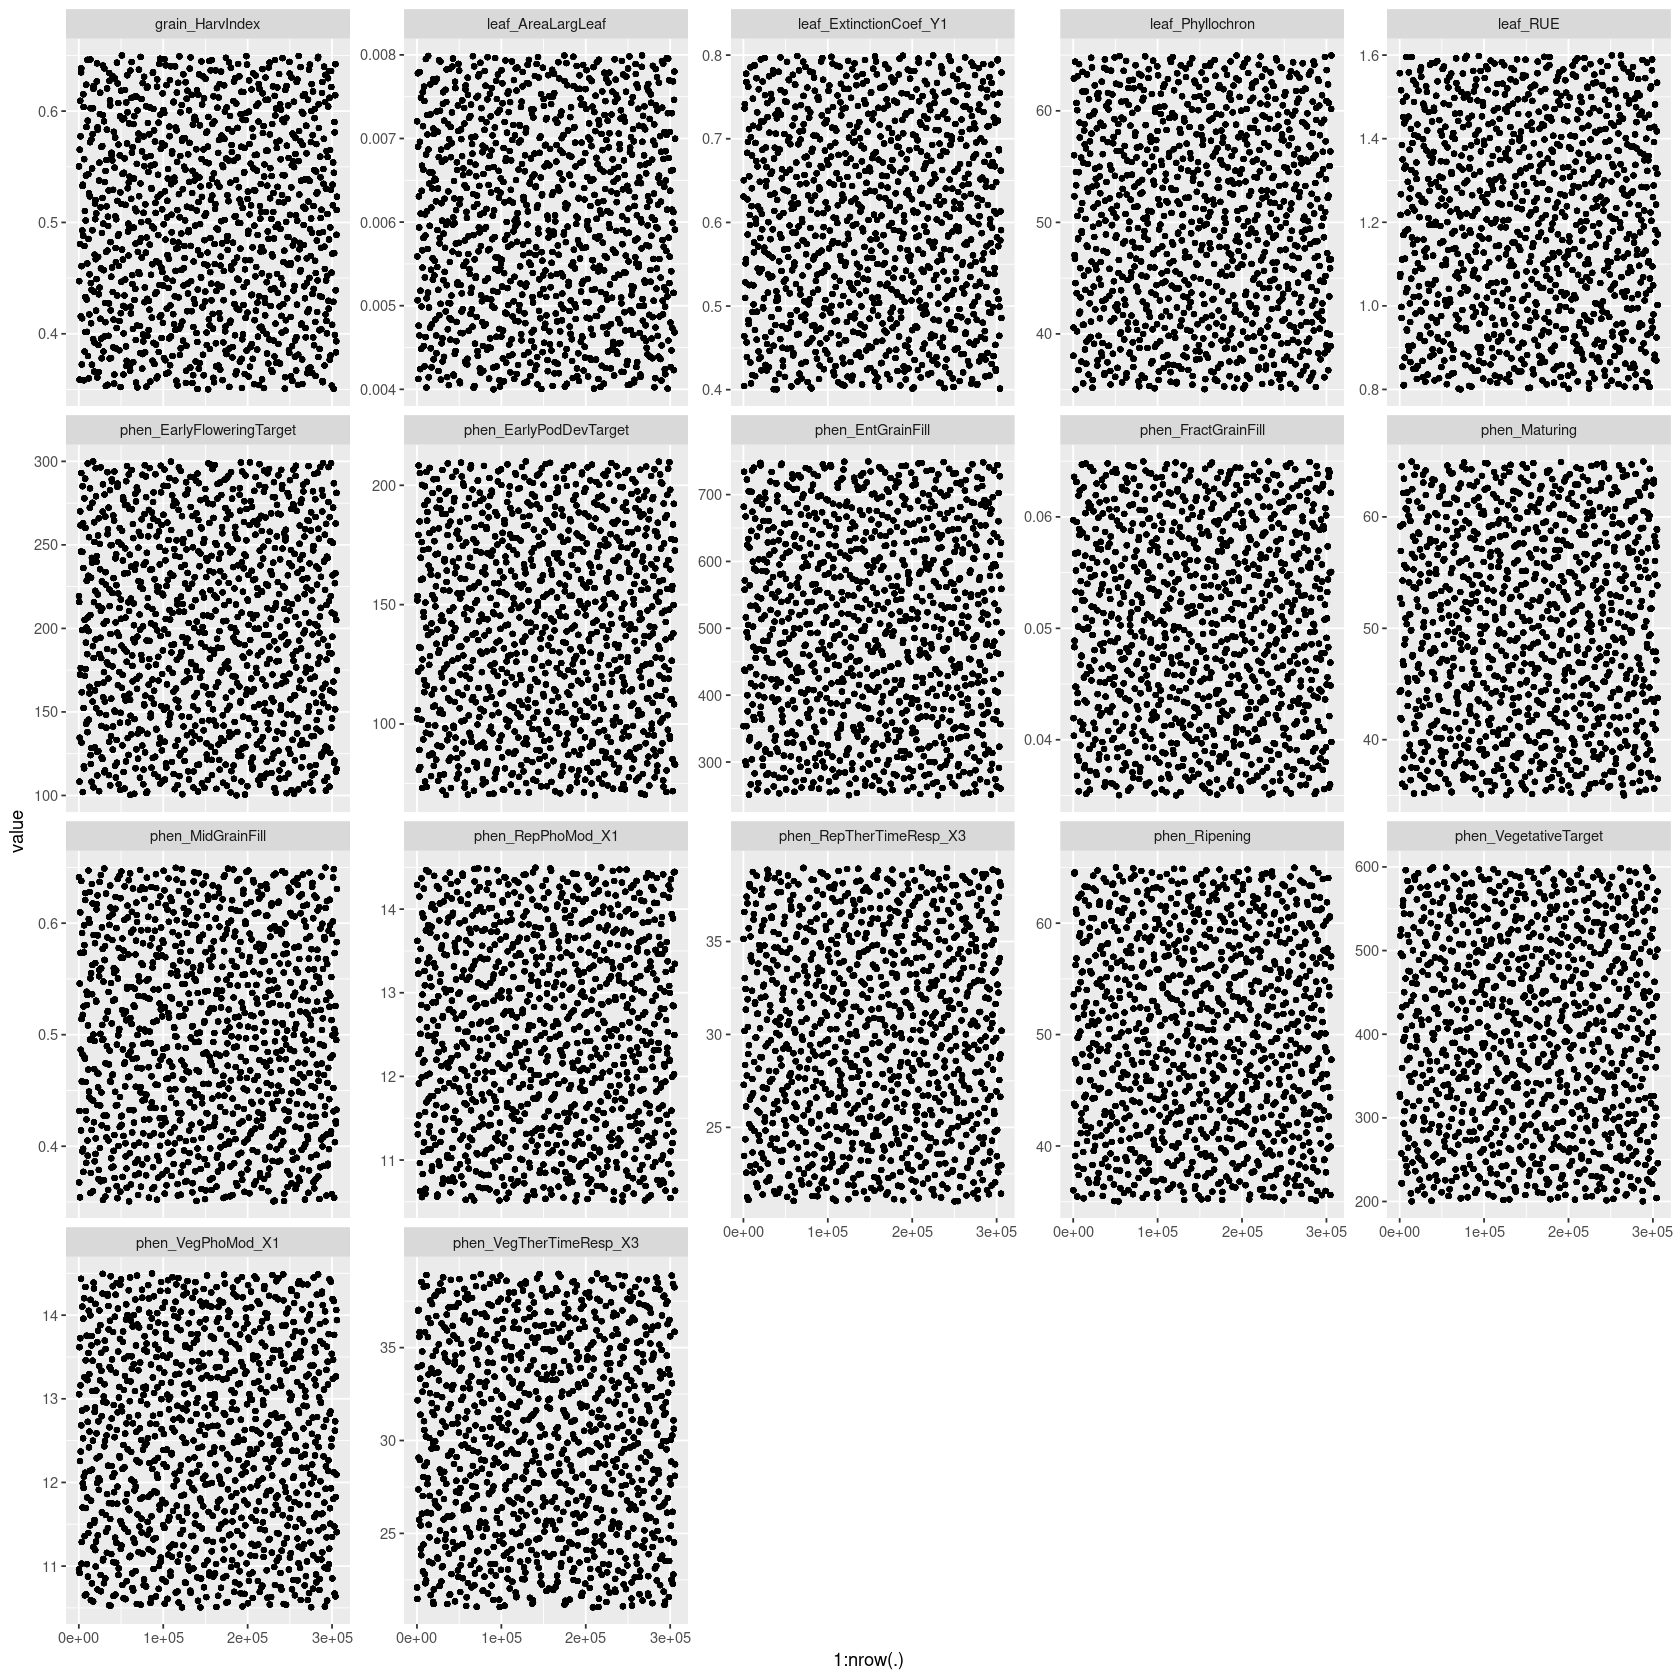

In [46]:
source(file.path("..", "R", "init.R"))
init(where = "container")

plot_samples_distribution()

# Generate apsimx files

In [8]:
sensi_tmp_folder <- create_tmp_dir_from_base_folder("tmp_sensi_1")
sensi_tmp_folder

[1] "/home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1"

### WARNING: CHECK BASESIM FILEPATH BELOW
### WARNING: CHECK BASESIM FILEPATH BELOW
### WARNING: CHECK BASESIM FILEPATH BELOW

In [ ]:
generate_apsimx_from_df(
  samples_df = samples_df,
  folder = sensi_tmp_folder,
  # sensit_base_sim_filepath = file.path(getwd(), "Soy-BR-sensit.apsimx"),
  # sensit_base_sim_filepath = file.path(BASE_SIMULATIONS_FOLDER, "Soy-BR-fields-MG6.apsimx"),
  sensit_base_sim_filepath = file.path(BASE_SIMULATIONS_FOLDER, "Soy-BR-fields-MG06BR_replac.apsimx"),
  runs_only_some = TRUE,
  N = 20,
  parallel = TRUE
)

In [32]:
print_stats_of_folder(sensi_tmp_folder)

apsimx_filepaths <- list_apsimx_filepaths(sensi_tmp_folder)
apsimx_filepaths[1:5]

[1] "Number of csvs: 0"
[1] "Number of apsimxs: 20"
[1] "Some files:"
[1] "    /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation1.apsimx" 
[2] "    /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation10.apsimx"
[3] "    /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation11.apsimx"
[4] "    /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation12.apsimx"
[5] "    /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation13.apsimx"


[1] "/home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation1.apsimx" 
[2] "/home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation10.apsimx"
[3] "/home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation11.apsimx"
[4] "/home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation12.apsimx"
[5] "/home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation13.apsimx"

# Run all apsimx from folder

In [36]:
# IDS_TO_RUN <- c(1, 10)
# aaa <- apsimx_filepaths[grepl(paste0("n",IDS_TO_RUN,".a", collapse = "|"), apsimx_filepaths)]
# length(aaa)
# aaa[1:5]

In [42]:
source(file.path("..", "R", "init.R"))
init(where = "container")

run_apsimx_from_folder(
  folder = sensi_tmp_folder,
  force_rerun = TRUE,
  runs_only_some = F,
  # N = 15,
  parallel = TRUE
)

[1] "Config for container!"
[1] "WARNING when running /usr/local/bin/Models /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation1.apsimx --csv --single-threaded=FALSE --cpu-count=2"
[1] "WARNING when running /usr/local/bin/Models /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation15.apsimx --csv --single-threaded=FALSE --cpu-count=2"


Timing stopped at: 29.68 1.135 31.14

Timing stopped at: 29.27 1.036 29.7



[1] "WARNING when running /usr/local/bin/Models /home/rstudio/apsimx-sensitivity/tmp/tmp_sensi_1/simulation4.apsimx --csv --single-threaded=FALSE --cpu-count=2"


Timing stopped at: 28.94 1.111 28.13

